<a href="https://colab.research.google.com/github/rishubhkhurana/EVA/blob/master/S14/S14_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libs

In [0]:
import shutil
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from PIL import Image
from fastprogress import progress_bar

In [2]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import zipfile
from glob import glob

## Dataset Stats

In [0]:
all_zipfiles = glob('/content/gdrive/My Drive/Depth/*.zip')

In [5]:
all_zipfiles

['/content/gdrive/My Drive/Depth/images_10.zip',
 '/content/gdrive/My Drive/Depth/images_20.zip',
 '/content/gdrive/My Drive/Depth/images_30.zip',
 '/content/gdrive/My Drive/Depth/images_40.zip',
 '/content/gdrive/My Drive/Depth/images_50.zip',
 '/content/gdrive/My Drive/Depth/images_60.zip',
 '/content/gdrive/My Drive/Depth/images_70.zip',
 '/content/gdrive/My Drive/Depth/images_80.zip',
 '/content/gdrive/My Drive/Depth/images_90.zip',
 '/content/gdrive/My Drive/Depth/images_100.zip']

In [0]:
all_csv = glob('/content/gdrive/My Drive/Depth/*.csv')

In [0]:
info_df = pd.DataFrame()

In [0]:
for f in all_csv:
  temp =pd.read_csv(f)
  info_df=info_df.append(temp).reset_index(drop=True)
  

In [9]:
info_df.shape

(400000, 8)

In [10]:
info_df.head()

,bg_images,bg_fg_images,fg_masks,bg_names,fg_names,flipped,random_number,depth_images
0,bg_bidx_1.jpg,bg_fg_bidx_1_fidx_1_random_1.jpg,bg_mask_bidx_1_fidx_1_random_1.jpg,/content/gdrive/My Drive/Depth/S14/modern-livi...,/content/gdrive/My Drive/Depth/fg_images/img89...,False,1,bg_depth_bidx_1_fidx_1_random_1.npy
1,bg_bidx_1.jpg,bg_fg_flipped_bidx_1_fidx_1_random_1.jpg,bg_mask_flipped_bidx_1_fidx_1_random_1.jpg,/content/gdrive/My Drive/Depth/S14/modern-livi...,/content/gdrive/My Drive/Depth/fg_images/img89...,True,1,bg_depth_flipped_bidx_1_fidx_1_random_1.npy
2,bg_bidx_1.jpg,bg_fg_bidx_1_fidx_1_random_2.jpg,bg_mask_bidx_1_fidx_1_random_2.jpg,/content/gdrive/My Drive/Depth/S14/modern-livi...,/content/gdrive/My Drive/Depth/fg_images/img89...,False,2,bg_depth_bidx_1_fidx_1_random_2.npy
3,bg_bidx_1.jpg,bg_fg_flipped_bidx_1_fidx_1_random_2.jpg,bg_mask_flipped_bidx_1_fidx_1_random_2.jpg,/content/gdrive/My Drive/Depth/S14/modern-livi...,/content/gdrive/My Drive/Depth/fg_images/img89...,True,2,bg_depth_flipped_bidx_1_fidx_1_random_2.npy
4,bg_bidx_1.jpg,bg_fg_bidx_1_fidx_1_random_3.jpg,bg_mask_bidx_1_fidx_1_random_3.jpg,/content/gdrive/My Drive/Depth/S14/modern-livi...,/content/gdrive/My Drive/Depth/fg_images/img89...,False,3,bg_depth_bidx_1_fidx_1_random_3.npy


In [12]:
info_df.tail()

,bg_images,bg_fg_images,fg_masks,bg_names,fg_names,flipped,random_number,depth_images
399995,bg_bidx_70.jpg,bg_fg_flipped_bidx_70_fidx_100_random_18.jpg,bg_mask_flipped_bidx_70_fidx_100_random_18.jpg,/content/gdrive/My Drive/Depth/S14/JamieNapier...,/content/gdrive/My Drive/Depth/fg_images/img10...,True,18,bg_depth_flipped_bidx_70_fidx_100_random_18.npy
399996,bg_bidx_70.jpg,bg_fg_bidx_70_fidx_100_random_19.jpg,bg_mask_bidx_70_fidx_100_random_19.jpg,/content/gdrive/My Drive/Depth/S14/JamieNapier...,/content/gdrive/My Drive/Depth/fg_images/img10...,False,19,bg_depth_bidx_70_fidx_100_random_19.npy
399997,bg_bidx_70.jpg,bg_fg_flipped_bidx_70_fidx_100_random_19.jpg,bg_mask_flipped_bidx_70_fidx_100_random_19.jpg,/content/gdrive/My Drive/Depth/S14/JamieNapier...,/content/gdrive/My Drive/Depth/fg_images/img10...,True,19,bg_depth_flipped_bidx_70_fidx_100_random_19.npy
399998,bg_bidx_70.jpg,bg_fg_bidx_70_fidx_100_random_20.jpg,bg_mask_bidx_70_fidx_100_random_20.jpg,/content/gdrive/My Drive/Depth/S14/JamieNapier...,/content/gdrive/My Drive/Depth/fg_images/img10...,False,20,bg_depth_bidx_70_fidx_100_random_20.npy
399999,bg_bidx_70.jpg,bg_fg_flipped_bidx_70_fidx_100_random_20.jpg,bg_mask_flipped_bidx_70_fidx_100_random_20.jpg,/content/gdrive/My Drive/Depth/S14/JamieNapier...,/content/gdrive/My Drive/Depth/fg_images/img10...,True,20,bg_depth_flipped_bidx_70_fidx_100_random_20.npy


How many different files for bg, bg_fg, masks and depth?
Two ways to find out--

1. Read from dataframe stored during file creation

2. Open all zipfiles one by one and then count the number of actual files stored

Let's do it both ways.

In [11]:
print(f"Number of unique background files stored in info dataframe:{info_df['bg_images'].nunique()}")
print(f"Number of unique background_foreground images files stored in info dataframe:{info_df['bg_fg_images'].nunique()}")
print(f"Number of unique foreground images files stored in info dataframe:{info_df['fg_names'].nunique()}")
print(f"Number of unique foreground masks images files stored in info dataframe:{info_df['fg_masks'].nunique()}")
print(f"Number of unique depth images files stored in info dataframe:{info_df['depth_images'].nunique()}")

Number of unique background files stored in info dataframe:70
Number of unique background_foreground images files stored in info dataframe:280000
Number of unique foreground images files stored in info dataframe:100
Number of unique foreground masks images files stored in info dataframe:280000
Number of unique depth images files stored in info dataframe:280000


While we read the files and confirm how many distinct files we have stored, let's plot few of them along the way and also compute mean,std

In [56]:
depth_imgs_total=np.zeros(3)
depth_imgs_sq=np.zeros(3)
bg_fg = np.zeros(3).astype('float64')
bg_fg_sq = np.zeros(3).astype('float64')
bg_masks = np.zeros(1).astype('float64')
bg_masks_sq = np.zeros(1).astype('float64')
bg_images = np.zeros(3).astype('float64')
bg_images_sq = np.zeros(3).astype('float64')
bg_depth = np.zeros(1).astype('float64')
bg_depth_sq = np.zeros(1).astype('float64')
all_bg_files=0
all_bg_fg_files=0
all_depth_files=0
all_masks_files=0

for i,zfname in enumerate(progress_bar(all_zipfiles[:])):

  print(f"Extracting files from the path: {zfname}")
  f=zipfile.ZipFile(zfname)
  f.extractall()
  print(f"extracted all files from path:{zfname}")
  print(f"Reading background files")
  temp_path = Path('./bg_images')
  flist = list(temp_path.iterdir())
  bg_files_pergroup = len(flist)
  all_bg_files+=len(flist)
  temp_mean=np.zeros(3).astype('float64')
  temp_sq=np.zeros(3).astype('float64')
  for f in flist:
    temp = (np.array(Image.open(f))/255.).astype('float64')
    temp_mean+=temp.mean((0,1))
    temp_sq+=(temp**2).mean((0,1))
  bg_images+=temp_mean/bg_files_pergroup
  bg_images_sq+=temp_sq/bg_files_pergroup
  print("-------------------------------")
  print(f"Reading background foreground files")
  temp_path = Path('./bg_fg_images')
  flist = list(temp_path.iterdir())
  bg_fg_files_pergroup = len(flist)
  all_bg_fg_files+=len(flist) 
  temp_mean=np.zeros(3).astype('float64')
  temp_sq=np.zeros(3).astype('float64')
  for f in flist:
    temp = (np.array(Image.open(f))/255.).astype('float64')
    temp_mean+=temp.mean((0,1))
    temp_sq+=(temp**2).mean((0,1))
  bg_fg+=temp_mean/bg_fg_files_pergroup
  bg_fg_sq+=temp_sq/bg_fg_files_pergroup
  print("-------------------------------")
  print(f"Reading masks  files")
  temp_path = Path('./bg_masks')
  flist = list(temp_path.iterdir())
  masks_pergroup = len(flist)
  all_masks_files+=len(flist)  
  temp_mean=np.zeros(1).astype('float64')
  temp_sq=np.zeros(1).astype('float64')
  for f in flist:
    temp = (np.array(Image.open(f))/255.).astype('float64')
    temp_mean+=temp.mean((0,1))
    temp_sq+=(temp**2).mean((0,1))
  bg_masks+=temp_mean/masks_pergroup
  bg_masks_sq+=temp_sq/masks_pergroup
  print("-------------------------------")
  print(f"Reading depth  files")
  temp_path = Path('./bg_fg_depth_images')
  flist = list(temp_path.iterdir())
  depths_pergroup=len(flist)
  all_depth_files+=len(flist) 
  temp_mean=np.zeros(1).astype('float64')
  temp_sq=np.zeros(1).astype('float64')
  for f in flist:
    temp = (np.load(f)/255.).astype('float64')
    temp_mean+=temp.mean((0,1))
    temp_sq+=(temp**2).mean((0,1))
  bg_depth+=temp_mean/depths_pergroup
  bg_depth_sq+=temp_sq/depths_pergroup
  shutil.rmtree('./bg_fg_images')
  shutil.rmtree('./bg_fg_depth_images')
  shutil.rmtree('./bg_masks')
  shutil.rmtree('./bg_images')


Extracting files from the path: /content/gdrive/My Drive/Depth/images_10.zip
extracted all files from path:/content/gdrive/My Drive/Depth/images_10.zip
Reading background files
-------------------------------
Reading background foreground files
-------------------------------
Reading masks  files
-------------------------------
Reading depth  files
Extracting files from the path: /content/gdrive/My Drive/Depth/images_20.zip
extracted all files from path:/content/gdrive/My Drive/Depth/images_20.zip
Reading background files
-------------------------------
Reading background foreground files
-------------------------------
Reading masks  files
-------------------------------
Reading depth  files
Extracting files from the path: /content/gdrive/My Drive/Depth/images_30.zip
extracted all files from path:/content/gdrive/My Drive/Depth/images_30.zip
Reading background files
-------------------------------
Reading background foreground files
-------------------------------
Reading masks  files


In [57]:
print(f"Number of BackGround Images: {all_bg_files}")
print(f"Number of BackGround Foreground Images: {all_bg_fg_files}")
print(f"Number of Masks Images: {all_masks_files}")
print(f"Number of Depth Images: {all_depth_files}")

Number of BackGround Images: 100
Number of BackGround Foreground Images: 400000
Number of Masks Images: 400000
Number of Depth Images: 400000


In [61]:
mean_bg = bg_images*bg_files_pergroup/all_bg_files
sq_bg = bg_images_sq*bg_files_pergroup/all_bg_files
std_bg = np.sqrt(sq_bg - mean_bg**2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
print(f"Mean of Background Images: {mean_bg}")
print(f"Mean of Background Images: {std_bg}")

In [66]:
sq_bg

array([106.67919566, 106.77780885, 103.85616753])

In [67]:
mean_bg_fg = bg_fg*bg_fg_files_pergroup/all_bg_fg_files
sq_bg_fg = bg_fg_sq*bg_fg_files_pergroup/all_bg_fg_files
std_bg_fg = np.sqrt(sq_bg_fg - mean_bg_fg**2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


In [161]:
!ls

bg_fg_depth_images  bg_fg_images  bg_images  bg_masks  gdrive  sample_data


## Examples Images

In [0]:
import torchvision.utils as vutils
import skimage

In [0]:
temp_path = Path('./bg_images')
flist = list(temp_path.iterdir())
imgs=[]
for f in flist:
  imgs.append(np.array(Image.open(f)))

In [0]:
imgs = np.stack(imgs)

In [0]:
viz=skimage.util.montage(imgs, multichannel=True, fill=(0,0,0),grid_shape=(2,5))

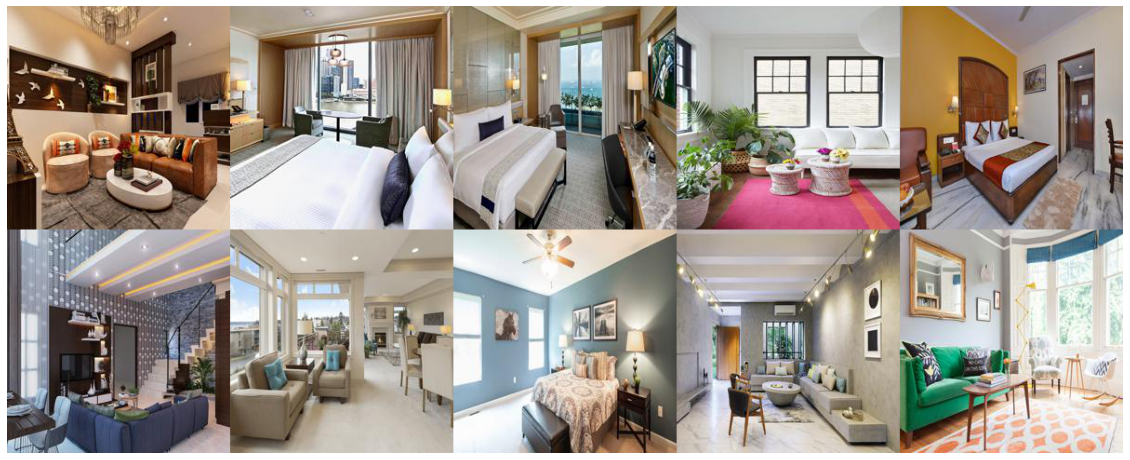

In [134]:
plt.figure(figsize=(20,20))
plt.imshow(viz)
plt.axis('off')
plt.show()

In [0]:
temp_path = Path('./bg_fg_images')
flist = list(temp_path.iterdir())
randints = np.random.randint(len(flist),size=10)
imgs=[]
selected_flist = [flist[i] for i in randints]
for f in selected_flist:
  imgs.append(np.array(Image.open(f)))

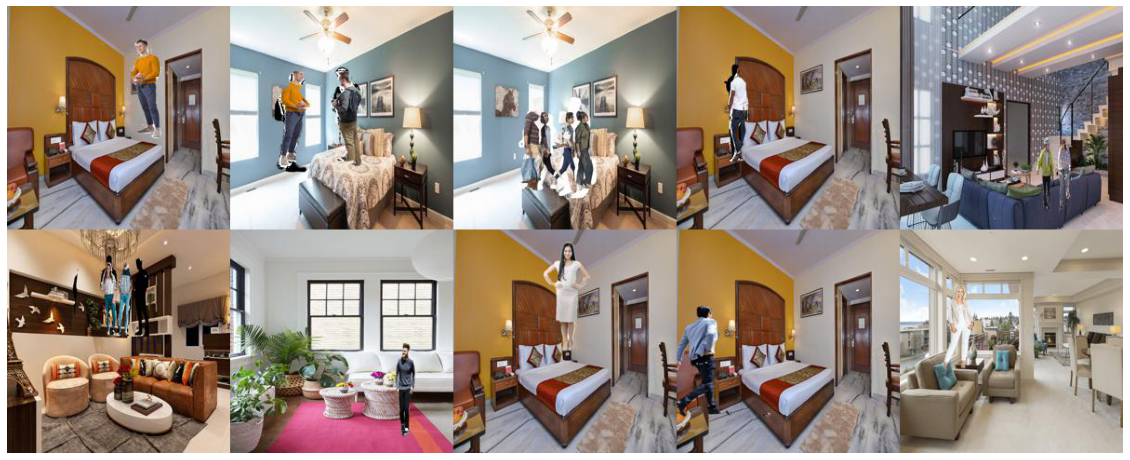

In [158]:
imgs = np.stack(imgs)
viz=skimage.util.montage(imgs, multichannel=True, fill=(0,0,0),grid_shape=(2,5))
plt.figure(figsize=(20,20))
plt.imshow(viz)
plt.axis('off')
plt.show()

In [0]:
temp_path = Path('./bg_masks')
flist = list(temp_path.iterdir())
randints = np.random.randint(len(flist),size=5)
imgs=[]
selected_flist = [flist[i] for i in randints]
for f in selected_flist:
  imgs.append(np.array(Image.open(f))[...,None].repeat(3,axis=2))

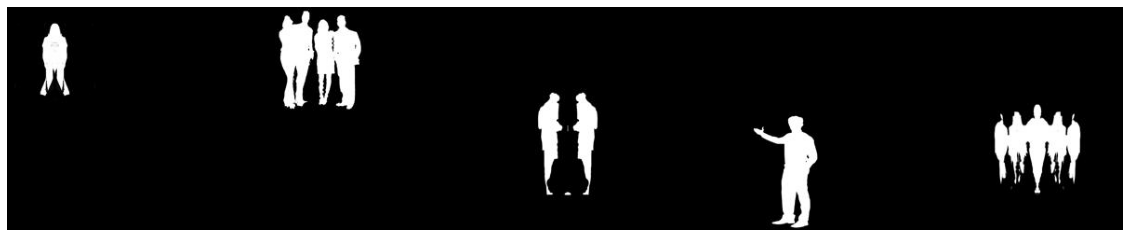

In [196]:
imgs = np.stack(imgs)
viz=skimage.util.montage(imgs, multichannel=True, fill=(0,0,0),grid_shape=(1,5))
plt.figure(figsize=(20,20))
plt.imshow(viz)
plt.axis('off')
plt.show()

In [0]:
temp_path = Path('./bg_fg_depth_images')
flist = list(temp_path.iterdir())
randints = np.random.randint(len(flist),size=5)
imgs=[]
selected_flist = [flist[i] for i in randints]
for f in selected_flist:
  imgs.append(np.load(f).repeat(3,axis=2))

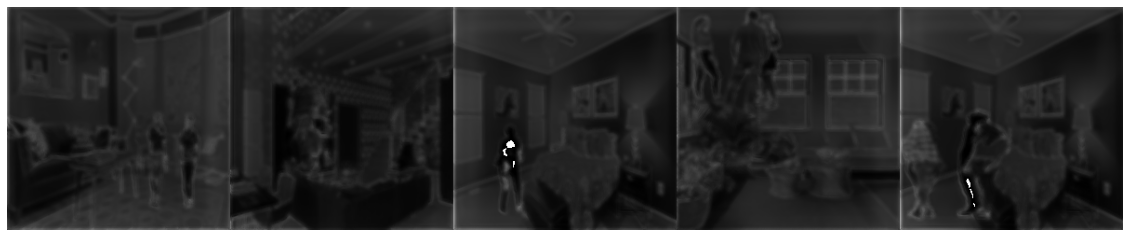

In [213]:
imgs = np.stack(imgs)
viz=skimage.util.montage(imgs, multichannel=True, fill=(0,0,0),grid_shape=(1,5))
plt.figure(figsize=(20,20))
plt.imshow(viz)
plt.axis('off')
plt.show()

In [0]:
imgs = np.stack(imgs)


In [208]:
imgs.shape

(5, 240, 240, 1)